# **0. LOADING DATASET**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/MachineLearning/praktikum11/"

In [32]:
import pandas as pd

path = '/content/gdrive/MyDrive/MachineLearning/praktikum11'
df = pd.read_csv(path + '/data/Data_AlfamartIndomaret_SouthJakarta.csv')
df.head()

,nama_tempat,rating_tempat,user_ratings_total,latitude,longitude,alamat_tempat,place_id,store,place_id.1,nama_kelurahan,nama_kecamatan,nama_kota
0,indomaret,4.3,104,-6.302203,106.791936,"jl. lb. bulus iii no.40, rt.9/rw.7, cilandak b...",ChIJaxj8TyDuaS4RmJ8rDkpB2GA,Indomaret,ChIJaxj8TyDuaS4RmJ8rDkpB2GA,Cilandak Barat,Cilandak,Kota Jakarta Selatan
1,indomaret,0.0,0,-6.307003,106.793690,"10, rt.4/rw.10, pondok labu, south jakarta city",ChIJPz4W5BPvaS4RoUnKBAiaL3o,Indomaret,ChIJPz4W5BPvaS4RoUnKBAiaL3o,Pondok Labu,Cilandak,Kota Jakarta Selatan
2,indomaret bdn raya,4.2,66,-6.279392,106.798442,"jl. bdn raya no.10, rt.10/rw.11, cilandak bar....",ChIJKZqyypTxaS4RkjwUtyXrkBY,Indomaret,ChIJKZqyypTxaS4RkjwUtyXrkBY,Cilandak Barat,Cilandak,Kota Jakarta Selatan
3,indomaret,4.7,3,-6.278223,106.797096,"jl. rs. fatmawati raya no.7, rt.8/rw.6, gandar...",ChIJzVqDlcTxaS4Rwlnqrz5hXbo,Indomaret,ChIJzVqDlcTxaS4Rwlnqrz5hXbo,Gandaria Selatan,Cilandak,Kota Jakarta Selatan
4,indomaret karang tengah raya,4.3,108,-6.301344,106.780550,"bona indah plaza, jl. karang tengah raya no.1,...",ChIJ7aqqqinuaS4RKy68g0RuyMk,Indomaret,ChIJ7aqqqinuaS4RKy68g0RuyMk,Lebak Bulus,Cilandak,Kota Jakarta Selatan


# **1. Cek Kualitas Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nama_tempat         675 non-null    object 
 1   rating_tempat       675 non-null    float64
 2   user_ratings_total  675 non-null    int64  
 3   latitude            675 non-null    float64
 4   longitude           675 non-null    float64
 5   alamat_tempat       675 non-null    object 
 6   place_id            675 non-null    object 
 7   store               675 non-null    object 
 8   place_id.1          675 non-null    object 
 9   nama_kelurahan      675 non-null    object 
 10  nama_kecamatan      675 non-null    object 
 11  nama_kota           675 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 63.4+ KB


In [6]:
df.isnull().sum()

,0
nama_tempat,0
rating_tempat,0
user_ratings_total,0
latitude,0
longitude,0
alamat_tempat,0
place_id,0
store,0
place_id.1,0
nama_kelurahan,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,rating_tempat,user_ratings_total,latitude,longitude
count,675.000000,675.000000,675.000000,675.000000
mean,3.702963,59.989630,-6.265439,106.810942
std,1.475474,86.420552,0.038492,0.031146
min,0.000000,0.000000,-6.363334,106.740238
25%,3.900000,4.000000,-6.291581,106.787462
50%,4.300000,18.000000,-6.256166,106.814950
75%,4.500000,87.500000,-6.236452,106.836770
max,5.000000,645.000000,-6.204882,106.863806


# **2. Siapkan Fitur GPS untuk DBSCAN**

In [25]:
gps = df[["latitude","longitude"]]
gps.head()

,latitude,longitude
0,-6.302203,106.791936
1,-6.307003,106.793690
2,-6.279392,106.798442
3,-6.278223,106.797096
4,-6.301344,106.780550


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(gps)   # hasil normalisasi → dipakai DBSCAN

# **3. Jalankan DBSCAN**

In [27]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.25, min_samples=6)
labels = db.fit_predict(X)

df["cluster"] = labels
df.head()

,nama_tempat,rating_tempat,user_ratings_total,latitude,longitude,alamat_tempat,place_id,store,place_id.1,nama_kelurahan,nama_kecamatan,nama_kota,cluster
0,indomaret,4.3,104,-6.302203,106.791936,"jl. lb. bulus iii no.40, rt.9/rw.7, cilandak b...",ChIJaxj8TyDuaS4RmJ8rDkpB2GA,Indomaret,ChIJaxj8TyDuaS4RmJ8rDkpB2GA,Cilandak Barat,Cilandak,Kota Jakarta Selatan,0
1,indomaret,0.0,0,-6.307003,106.793690,"10, rt.4/rw.10, pondok labu, south jakarta city",ChIJPz4W5BPvaS4RoUnKBAiaL3o,Indomaret,ChIJPz4W5BPvaS4RoUnKBAiaL3o,Pondok Labu,Cilandak,Kota Jakarta Selatan,0
2,indomaret bdn raya,4.2,66,-6.279392,106.798442,"jl. bdn raya no.10, rt.10/rw.11, cilandak bar....",ChIJKZqyypTxaS4RkjwUtyXrkBY,Indomaret,ChIJKZqyypTxaS4RkjwUtyXrkBY,Cilandak Barat,Cilandak,Kota Jakarta Selatan,0
3,indomaret,4.7,3,-6.278223,106.797096,"jl. rs. fatmawati raya no.7, rt.8/rw.6, gandar...",ChIJzVqDlcTxaS4Rwlnqrz5hXbo,Indomaret,ChIJzVqDlcTxaS4Rwlnqrz5hXbo,Gandaria Selatan,Cilandak,Kota Jakarta Selatan,0
4,indomaret karang tengah raya,4.3,108,-6.301344,106.780550,"bona indah plaza, jl. karang tengah raya no.1,...",ChIJ7aqqqinuaS4RKy68g0RuyMk,Indomaret,ChIJ7aqqqinuaS4RKy68g0RuyMk,Lebak Bulus,Cilandak,Kota Jakarta Selatan,0


# **4. Analisis Cluster → DENSITAS GPS**

In [29]:
df["cluster"].value_counts()

,count
cluster,
0,674
-1,1


# **5. Visualisasi Persebaran Cluster**

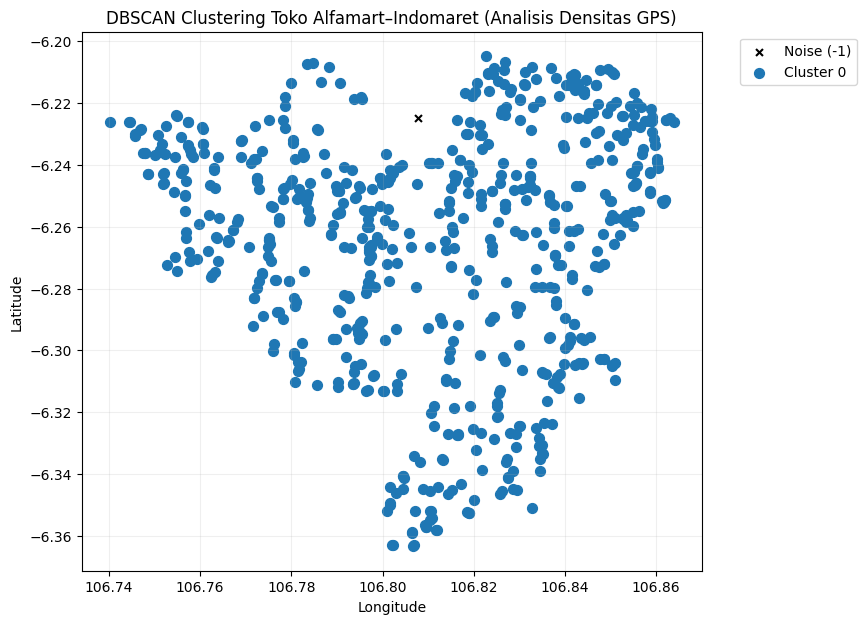

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,7))

unique_clusters = sorted(df["cluster"].unique())
for c in unique_clusters:
    subset = df[df["cluster"] == c]

    if c == -1:
        plt.scatter(subset["longitude"], subset["latitude"],
                    s=25, c="black", marker="x", label="Noise (-1)")
    else:
        plt.scatter(subset["longitude"], subset["latitude"],
                    s=50, label=f"Cluster {c}")

plt.title("DBSCAN Clustering Toko Alfamart–Indomaret (Analisis Densitas GPS)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.2)
plt.show()

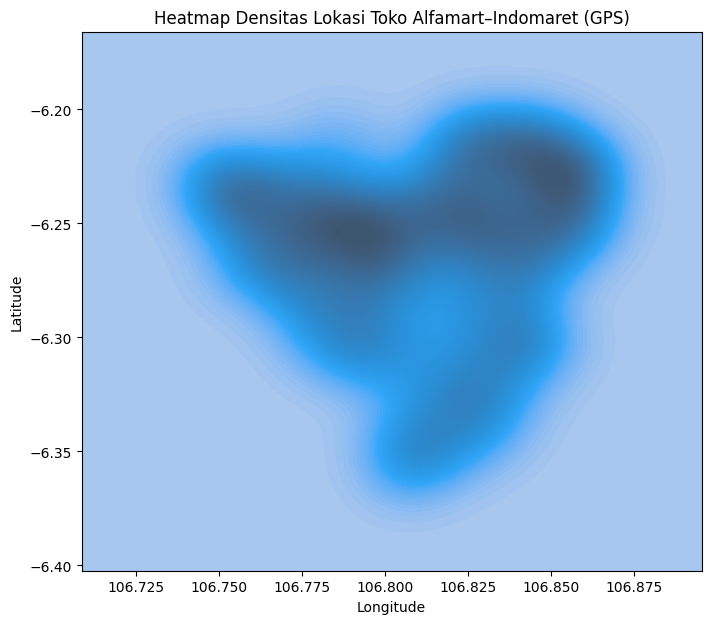

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,7))

# plot heatmap densitas (kde)
sns.kdeplot(
    x=df["longitude"],
    y=df["latitude"],
    fill=True,         # area diisi warna
    thresh=0,          # tampilkan semua level
    levels=100,        # semakin banyak level → semakin halus
)

plt.title("Heatmap Densitas Lokasi Toko Alfamart–Indomaret (GPS)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()